In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('~/Downloads/the-movies-dataset/movies_metadata.csv', low_memory=False).dropna(axis=1, how='all')
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [6]:
df_high_rated = df.query('vote_average > 8 and vote_count > 20')
df_high_rated = df_high_rated[['title', 'vote_average', 'vote_count']]
# Q-1: How many highly-rated movies are in this dataset?
df_high_rated.shape

(179, 3)

In [23]:
fixture = {
    "Star Wars": 9,
    "Paris is Burning": 8,
    "Dead Poets Society": 7,
    "The Empire Strikes Back": 9.5,
    "The Shining": 8,
    "Return of the Jedi": 8,
    "1941": 8,
    "Forrest Gump": 7.5,
}
my_ratings = pd.DataFrame({
    'title': [k for k,v in fixture.items()],
    'my_vote': [v for k,v in fixture.items()],
})
my_ratings = my_ratings.set_index('title')
my_ratings

,my_vote
title,
Star Wars,9.0
Paris is Burning,8.0
Dead Poets Society,7.0
The Empire Strikes Back,9.5
The Shining,8.0
Return of the Jedi,8.0
1941,8.0
Forrest Gump,7.5


In [29]:
imdb_ratings = df[['title', 'vote_average']]
imdb_ratings = imdb_ratings.set_index('title')

In [34]:
# Q-2: What’s the percentage difference between my rating for Star Wars and its popular rating? 
compare_votes = my_ratings.merge(imdb_ratings, left_index=True, right_index=True)
compare_votes['pct_diff'] = (compare_votes['vote_average']-compare_votes['my_vote'])/compare_votes['my_vote']
compare_votes

,my_vote,vote_average,pct_diff
title,,,
1941,8.0,5.6,-0.300000
Dead Poets Society,7.0,8.1,0.157143
Forrest Gump,7.5,8.2,0.093333
Paris is Burning,8.0,8.2,0.025000
Return of the Jedi,8.0,7.9,-0.012500
Star Wars,9.0,8.1,-0.100000
The Empire Strikes Back,9.5,8.2,-0.136842
The Shining,8.0,8.1,0.012500


In [36]:
# Q-3: Make up 3 questions you would like to answer about this movie data 
# using the techniques you have learned in this lesson and write them in the box.

# 1) what's the highest/lowest voted genre
# 2) what's the runtime distribution like
# 3) how many titles a production company produces in a lifetime
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [159]:
import json
import ast
def explode_names(str_list):
    str_list = str(str_list)
    if str_list == 'nan' or str_list == 'False':
        return []
    try:
        lst = ast.literal_eval(str_list)
        return list(map(lambda item: item['name'], lst))
    except:
        print("Problem parsing " + str(str_list)[:100])
        return []

companies = df['production_companies'].apply(explode_names)

In [125]:
movie_makers = pd.DataFrame(companies.values.tolist(), index=df.index)
movie_makers.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,Pixar Animation Studios,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,TriStar Pictures,Teitler Film,Interscope Communications,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,Warner Bros.,Lancaster Gate,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,Twentieth Century Fox Film Corporation,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,Sandollar Productions,Touchstone Pictures,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [126]:
movie_makers.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,Pixar Animation Studios,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,TriStar Pictures,Teitler Film,Interscope Communications,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,Warner Bros.,Lancaster Gate,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,Twentieth Century Fox Film Corporation,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,Sandollar Productions,Touchstone Pictures,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [131]:
movie_makers_list = movie_makers.unstack().reset_index()
movie_makers_list.columns = ['maker_#', 'movie_df_idx', 'maker_title']
movie_makers_list.head()

,maker_#,movie_df_idx,maker_title
0,0,0,Pixar Animation Studios
1,0,1,TriStar Pictures
2,0,2,Warner Bros.
3,0,3,Twentieth Century Fox Film Corporation
4,0,4,Sandollar Productions


In [139]:
movies_by_maker = movie_makers_list[['maker_title', 'movie_df_idx']].groupby('maker_title').count().reset_index()
movies_by_maker.columns = ['maker_title', 'count']
movies_by_maker.head()

,maker_title,count
0,"""DIA"" Productions GmbH & Co. KG",1
1,# Andrea Sperling Productions,1
2,# Lexyn Productions,1
3,'A' Production Committee,1
4,(주)로드픽쳐스,1


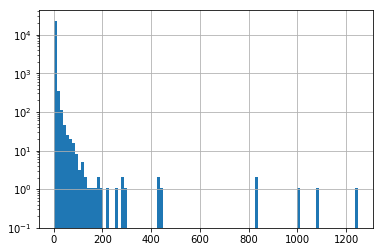

In [154]:
# 3) how many titles a production company produces in a lifetime 
# - there's just a few outperformers and most of the companies produce just one title
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
movies_by_maker['count'].hist(ax=ax, bins=100, bottom=0.1)
ax.set_yscale('log')

In [155]:
df['vote_average'].dtype

dtype('float64')

In [223]:
genres = df['genres'].apply(explode_names).values.tolist()
df_genres = pd.DataFrame(genres, index=df.index)
df_genres.head()

,0,1,2,3,4,5,6,7
0,Animation,Comedy,Family,None,None,None,None,None
1,Adventure,Fantasy,Family,None,None,None,None,None
2,Romance,Comedy,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None


In [224]:
df_genres = df_genres.unstack().reset_index(0)

In [225]:
df_genres.columns = ['genre_idx', 'genre_title']
df_genres['vote_average'] = df['vote_average']
df_genres.loc[0]

,genre_idx,genre_title,vote_average
0,0,Animation,7.7
0,1,Comedy,7.7
0,2,Family,7.7
0,3,None,7.7
0,4,None,7.7
0,5,None,7.7
0,6,None,7.7
0,7,None,7.7


In [226]:
df.iloc[0][['genres', 'vote_average']]

genres          [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
vote_average                                                  7.7
Name: 0, dtype: object

In [229]:
# 1) what's the highest/lowest voted genre
df_genres_counts = df_genres.groupby('genre_title').aggregate({'vote_average': 'mean'}).reset_index()
df_genres_counts.sort_values('vote_average', ascending=False, inplace=True)
df_genres_counts.head()

,genre_title,vote_average
2,Animation,6.275181
14,History,6.154220
30,War,6.041119
9,Drama,5.905221
17,Music,5.879599


In [231]:
df['runtime'] = pd.to_numeric(df['runtime'])

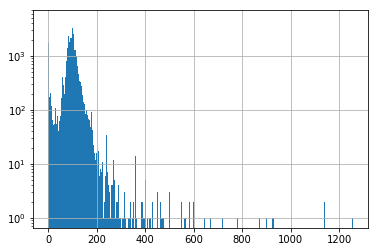

In [239]:
# 2) what's the runtime distribution like
fig, ax = plt.subplots()
df['runtime'].hist(ax=ax, bins=500)
ax.set_yscale('log')